In [458]:
import sympy as smp
import numpy as np
import scipy

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

In [459]:
#carregar dados

data = planilha_cartolina = pd.read_excel('./dados.xlsx')
g = 9.81
L = (29 - 0.25)*1e-2
d = 1*1e-3
b_l = 25.25*1e-3

sigma_bd = 0.05*1e-3
sigma_L = 0.1*1e-2


x_data = data["x(0,1cm)"][0:11]
y_data = data["(0,01g)"][0:11]

x_err = 0.1e-2
y_err = g*0.01e-3

x_data = (x_data - 2.9)*1e-2
y_data = (y_data)*g*1e-3

#erros de calibração alteram o valor de x0 alterando o valor de -2.9, mas não altera a inclinação
#um fit y = ax consideraria esse erro de calibração, enquanto usar y = ax + b contorna essa calibração

data

,"x(0,1cm)",F,"L(0,1cm)","∆L(0,5cm)",m,"(0,01g)",Unnamed: 6,"L(0,1cm).1","x(0,1cm).1",Unnamed: 9,"d(0,01mm)","b(0,05mm)"
0,2.9,0.0,"29,0m","2,5mm",0.0,0.0,NaN,29,10.5,NaN,0.1,25.25
1,4.1,1.0,NaN,NaN,1.0,65.6,NaN,28,9.7,NaN,NaN,NaN
2,4.9,2.0,NaN,NaN,2.0,109.3,NaN,27,9.0,NaN,NaN,NaN
3,5.6,3.0,NaN,NaN,3.0,151.5,NaN,26,8.5,NaN,NaN,NaN
4,6.4,4.0,NaN,NaN,4.0,194.1,NaN,25,7.8,NaN,NaN,NaN
5,7.1,5.0,NaN,NaN,5.0,236.4,NaN,24,7.2,NaN,NaN,NaN
6,7.8,6.0,NaN,NaN,6.0,280.0,NaN,23,6.6,NaN,NaN,NaN
7,8.5,7.0,NaN,NaN,7.0,322.2,NaN,22,6.1,NaN,NaN,NaN
8,9.1,8.0,NaN,NaN,8.0,364.7,NaN,21,5.6,NaN,NaN,NaN
9,9.8,9.0,NaN,NaN,9.0,413.2,NaN,20,5.2,NaN,NaN,NaN


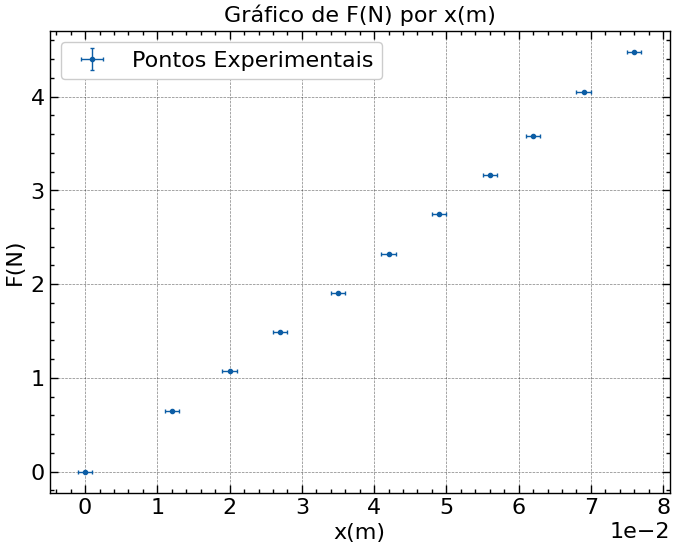

In [460]:
#plot só com os pontos

plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3, capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de F(N) por x(m)')

plt.xlabel(r'x(m)')
plt.ylabel(r'F(N)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()

In [461]:
#fazer fit forma 1 (queria testar se da na mesma -- e da exatamente os mesmos resultados)
#esse jeito funciona pra qualquer função

def func(x,a, b):
    return a*x + b

popt, pcov = curve_fit(func, x_data, y_data)
a, b = popt
a_err, b_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))
print('a = ', a)
print('b = ', b)
print(r'r^2 =', r2)
print('a_err = ', a_err)
print('b_err = ', b_err)

a =  59.09339291989483
b =  -0.09360391706201299
r^2 = 0.998187629127875
a_err =  0.8393344735523136
b_err =  0.03935200578452192


In [462]:
#fit da segunda forma

result = scipy.stats.linregress(x_data, y_data)

print('a = ', result.slope)
print('b = ', result.intercept)
print(r'r^2 =', result.rvalue**2)
print('a_err = ', result.stderr)
print('b_err = ', result.intercept_stderr)

a =  59.093392517923895
b =  -0.09360389527544566
r^2 = 0.9981876291278755
a_err =  0.8393345755849422
b_err =  0.0393520099635625


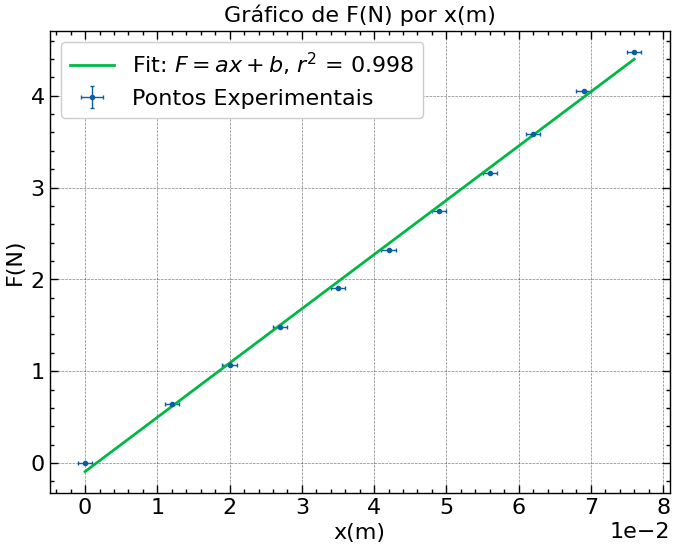

In [463]:
plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de F(N) por x(m)')

plt.xlabel(r'x(m)')
plt.ylabel(r'F(N)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.plot(x_data, func(x_data, *popt), label= r'Fit: $F = ax + b$, $r^2$ = %.3f' % (r2))
plt.legend()


In [464]:
#fit para y = kx

def func(x,k):
    return k*x

popt, pcov = curve_fit(func, x_data, y_data)
k = popt[0]
k_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))

print('k = ', k)
print(r'r^2 =', r2)
print('k_err = ', a_err)


k =  57.35912679352838
r^2 = 0.9970482754217914
k_err =  0.8393344735523136


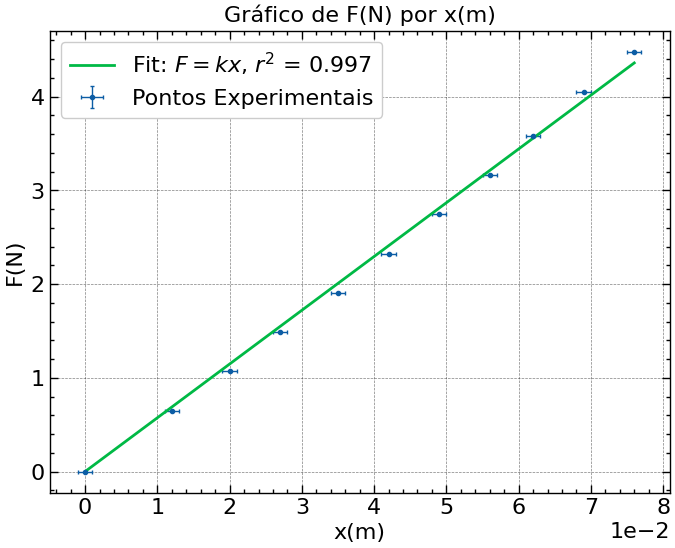

In [465]:
plt.errorbar(x_data, y_data, xerr = x_err, yerr = y_err, marker = 'o', ls = '', ms = 3,capsize=1.5, elinewidth=1,label ="Pontos Experimentais")
plt.title(r'Gráfico de F(N) por x(m)')

plt.xlabel(r'x(m)')
plt.ylabel(r'F(N)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.plot(x_data, func(x_data, *popt), label= r'Fit: $F = kx $, $r^2$ = %.3f' % (r2))
plt.legend()


#fit pior, erros de calibração de x0

In [466]:
#calcular módulo de young

E = 4*a*(L**3)/(d**3 *b_l)
print(f'{E:.5e}')

2.22460e+11
